Utilizando as importações do arquivo "Aula04" para dar continuidade na aula

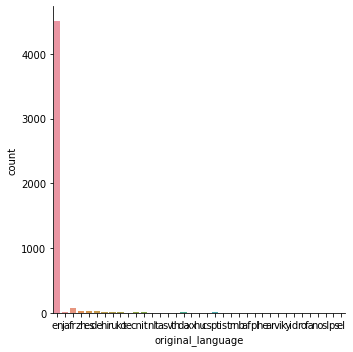

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tmdb = pd.read_csv("./arquivos/tmdb_5000_movies.csv")
contagem_de_linguas = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_linguas.columns = ["lingua_original", "total"]
sns.catplot(x = "original_language", kind = "count", data = tmdb)

Criando um gráfico de pizza = Não utilizado quando tem muitas informações

([<matplotlib.patches.Wedge at 0x1f101663a90>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

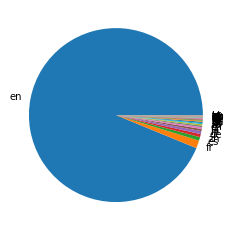

In [3]:
plt.pie(contagem_de_linguas["total"], labels = contagem_de_linguas["lingua_original"])

Comparar o maior gráfico de linguas (no caso, ingles) com as demais linguas 

In [13]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_ingles
print(f"Total ingles: {total_ingles}\nTotal das linguas restantes: {total_do_resto}")

Total ingles: 4505
Total das linguas restantes: 298


Cria uma lista com os dados que pegamos acima (total ingles e outras linguas)

In [18]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


cria o dataframe com os dados de "dados" sem alterar a variavel como o código anterior

In [15]:
pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


Plotar esse novo dataframe em forma de barras

<AxesSubplot:xlabel='lingua', ylabel='total'>

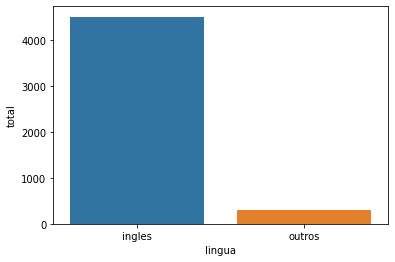

In [20]:
sns.barplot(x = 'lingua', y = 'total' , data = dados)

Até o momento, comparamos a língua inglesa com as demais para gerar esse gráfico acima, agora vamos ver como está as outras linguas comparadas a elas.

In [29]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

criar o gráfico apenas com as linguas que nao sao ingles

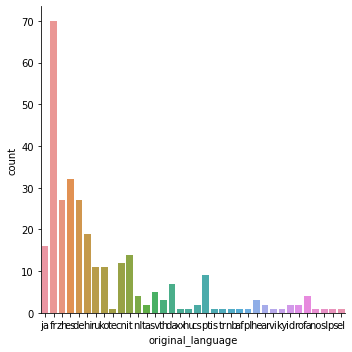

In [30]:
sns.catplot(x = 'original_language', kind = 'count', data = filmes_sem_lingua_original_em_ingles)

O que aprendemos nesta aula:

Comparar categorias;
O que é uma Series;
Instalar o seaborn;
Transformar em dataframe com a função to_frame();
Remover o índice para gerar duas colunas usando a função reset_index();
Utilizar o Categorical do seaborn.